In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import json
import io

# 3D plots

## Idle latency vs Average download speed (Jan 2011 - Jul 2023)

In [61]:
latency = pd.read_csv("data_rtt_max_week/Average of Idle latency.csv")
speed = pd.read_csv("data_rtt_max_week/Average download speed.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per week")
merge_df['dtime per week'] = pd.to_datetime(merge_df['dtime per week'], format='%Y-%m-%d')
merge_df.tail()

,dtime per week,Average speed (Mbps),Average latency (ms)
653,2023-07-03,284.496,34.005
654,2023-07-10,287.265,34.012
655,2023-07-17,291.132,33.686
656,2023-07-24,289.712,33.954
657,2023-07-31,289.100,33.680


In [62]:
merge_df.shape

(658, 3)

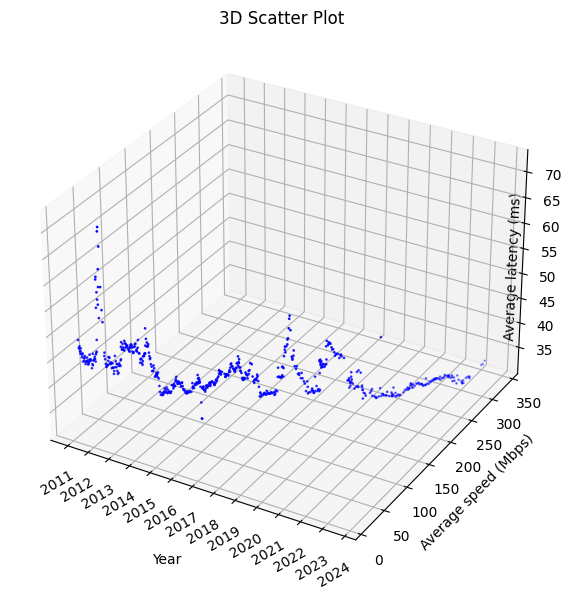

In [24]:
# Create a 3D plot
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(111, projection='3d')
x_num = dates.date2num(merge_df['dtime per week'])

# Scatter plot
ax.scatter(x_num, merge_df['Average speed (Mbps)'], merge_df['Average latency (ms)'], c='b', marker='.', s=3.5)

# Format x-axis as dates
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y'))

ax.tick_params(axis='x', labelrotation=30)
# Increase space at the bottom to accommodate z-axis title
# plt.subplots_adjust(right=1.15)

# Set labels
ax.set_xlabel('Year', labelpad=15)
ax.set_ylabel('Average speed (Mbps)')
ax.set_zlabel('Average latency (ms)', labelpad=-25)
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()

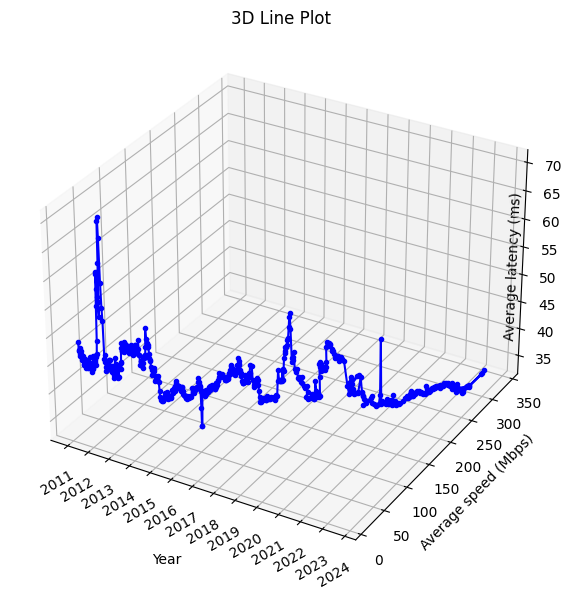

In [25]:
# Create a 3D plot
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(111, projection='3d')
x_num = dates.date2num(merge_df['dtime per week'])

# Scatter plot
ax.plot(x_num, merge_df['Average speed (Mbps)'], merge_df['Average latency (ms)'], c='b', marker='.')

# Format x-axis as dates
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y'))

ax.tick_params(axis='x', labelrotation=30)
# Increase space at the bottom to accommodate z-axis title
# plt.subplots_adjust(right=1.15)

# Set labels
ax.set_xlabel('Year', labelpad=15)
ax.set_ylabel('Average speed (Mbps)')
ax.set_zlabel('Average latency (ms)', labelpad=-25)
ax.set_title('3D Line Plot')

# Show the plot
plt.show()

In [63]:
# Define bins and labels for the ranges
bins = [0, 30, 40, 50, 60, 70, 100]
labels = ['0-30', '30-40', '40-50', '50-60', '60-70', '70-100']

merge_df['LatencyRange (ms)'] = pd.cut(merge_df['Average latency (ms)'], bins=bins, labels=labels, right=False)
merge_df.tail()

,dtime per week,Average speed (Mbps),Average latency (ms),LatencyRange (ms)
653,2023-07-03,284.496,34.005,30-40
654,2023-07-10,287.265,34.012,30-40
655,2023-07-17,291.132,33.686,30-40
656,2023-07-24,289.712,33.954,30-40
657,2023-07-31,289.100,33.680,30-40


In [66]:
print(merge_df["LatencyRange (ms)"].value_counts().to_markdown(tablefmt="grid", floatfmt=""))

+--------+---------------------+
|        |   LatencyRange (ms) |
+========+=====================+
| 40-50  |               469.0 |
+--------+---------------------+
| 30-40  |               125.0 |
+--------+---------------------+
| 50-60  |                31.0 |
+--------+---------------------+
| 60-70  |                 6.0 |
+--------+---------------------+
| 70-100 |                 2.0 |
+--------+---------------------+
| 0-30   |                 0.0 |
+--------+---------------------+


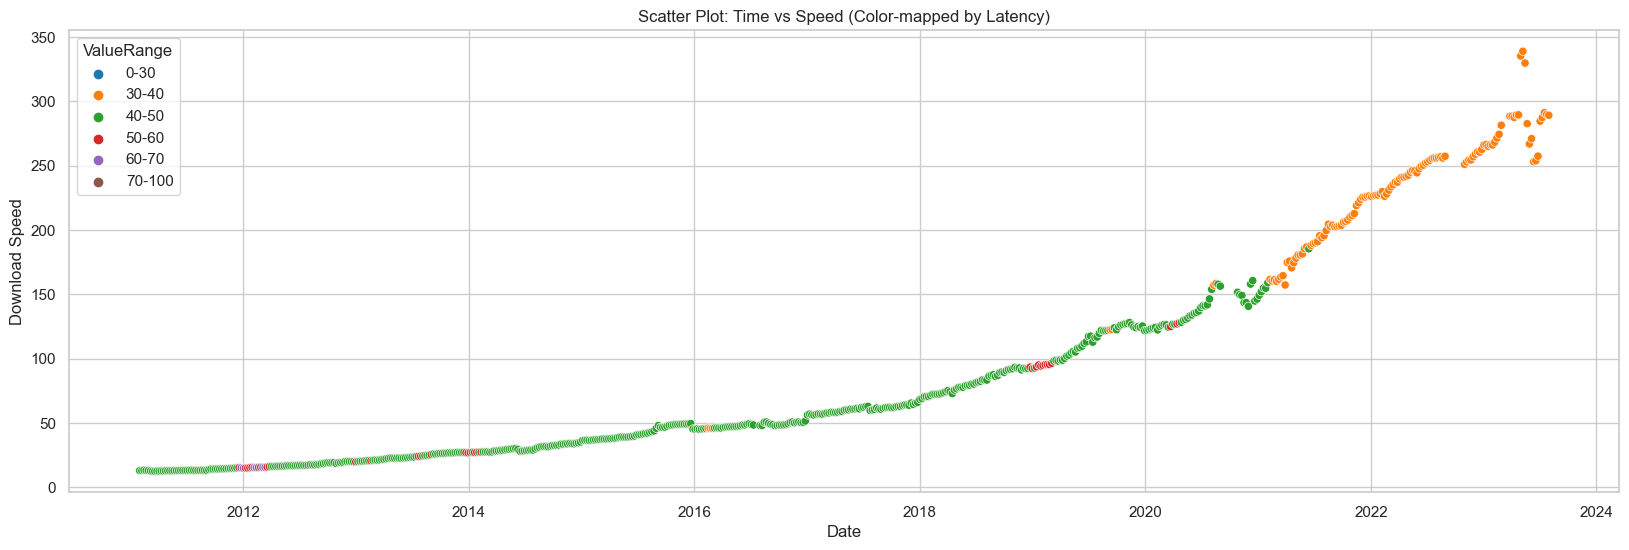

In [53]:
# Create a custom colormap with a gradient from light to dark red
# custom_cmap = sns.light_palette("red", as_cmap=True)
sns.scatterplot(x='dtime per week', y='Average speed (Mbps)', hue='ValueRange', data=merge_df, palette='tab10')
# plt.figure(figsize=(20,6))
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(rc={'figure.figsize':(20,6)}, style='whitegrid')
plt.xlabel('Date')
plt.ylabel('Download Speed')
plt.title('Scatter Plot: Time vs Speed (Color-mapped by Latency)')
plt.show()

# Monthly plots

## Idle latency vs Average download speed (Jan 2011 - Jul 2023)

In [14]:
latency = pd.read_csv("data_rtt_max_monthly/Average of Idle latency.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average download speed.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
# Define bins and labels for the ranges
# bins = [0, 40, 45, 50, 100]
val = merge_df["Average latency (ms)"].describe().values
bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]

labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
merge_df['LatencyRange (ms)'] = pd.cut(merge_df['Average latency (ms)'], bins=bins, labels=labels, right=False)
merge_df.tail()
print(merge_df["LatencyRange (ms)"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

+-------+---------------------+
|       |   LatencyRange (ms) |
+=======+=====================+
| 33-42 |                43.0 |
+-------+---------------------+
| 42-45 |                37.0 |
+-------+---------------------+
| 45-47 |                30.0 |
+-------+---------------------+
| 47-64 |                33.0 |
+-------+---------------------+


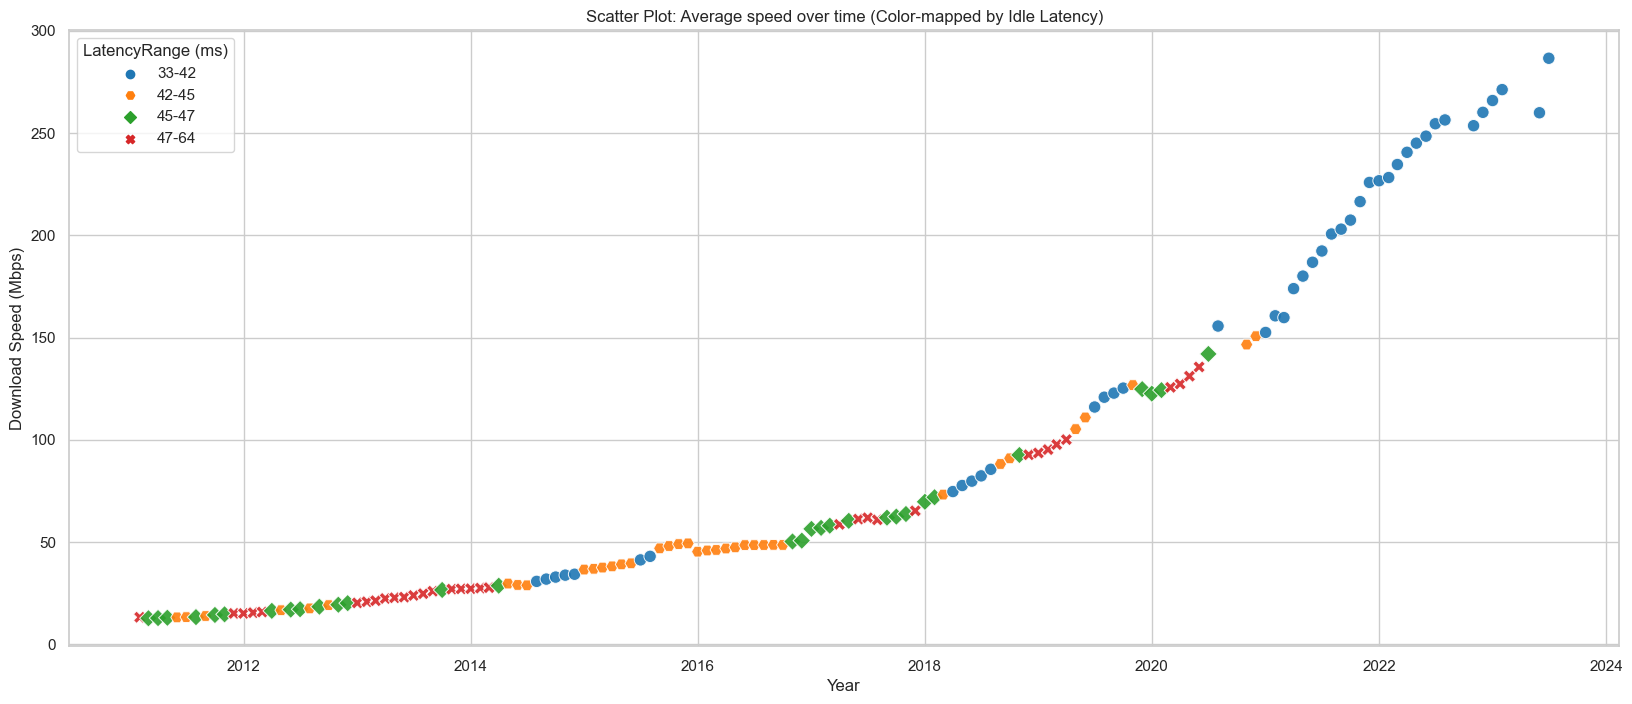

In [15]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='LatencyRange (ms)', style='LatencyRange (ms)' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by Idle Latency)')
plt.show()

## Downstream LUL vs Average download speed (Jan 2011 - Jul 2023)

In [16]:
latency = pd.read_csv("data_rtt_max_monthly/Average of downstream LUL.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average download speed.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
# Define bins and labels for the ranges
# bins = [0, 230, 280, 330, 390]
val = merge_df["Average latency (ms)"].describe().values
bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
merge_df['LatencyRange (ms)'] = pd.cut(merge_df['Average latency (ms)'], bins=bins, labels=labels, right=False)
merge_df.tail()
print(merge_df["LatencyRange (ms)"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

+---------+---------------------+
|         |   LatencyRange (ms) |
+=========+=====================+
| 127-219 |                37.0 |
+---------+---------------------+
| 219-292 |                35.0 |
+---------+---------------------+
| 292-327 |                36.0 |
+---------+---------------------+
| 327-380 |                35.0 |
+---------+---------------------+


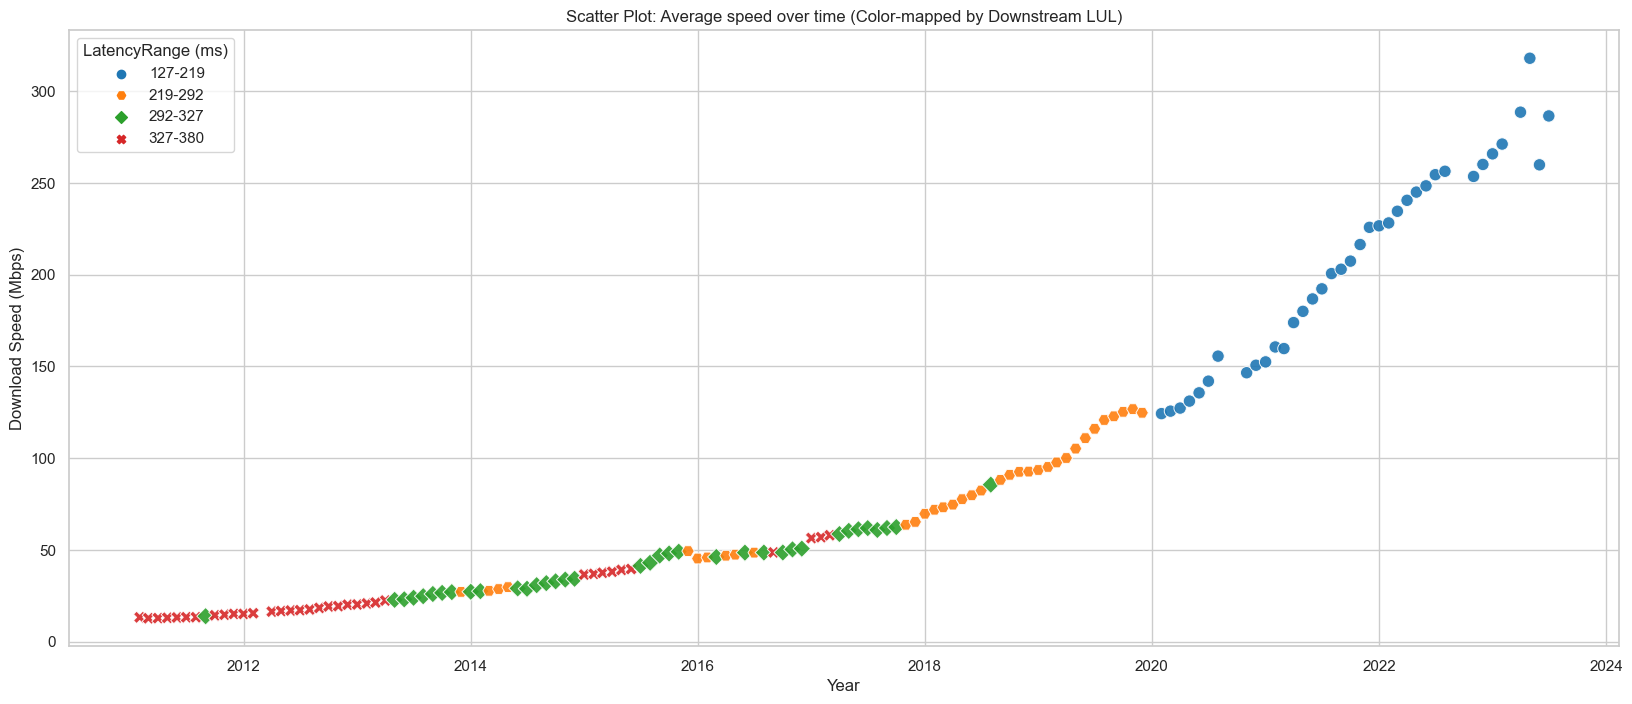

In [17]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='LatencyRange (ms)', style='LatencyRange (ms)' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by Downstream LUL)')
plt.show()

## Upstream LUL vs Average upload speed (Jan 2011 - Jul 2023)

In [18]:
latency = pd.read_csv("data_rtt_max_monthly/Average of Upstream LUL.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average upload speed.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['Average latency (ms)'] = merge_df['Average latency (ms)'].str.replace(",","").astype(float)
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
# Define bins and labels for the ranges
# bins = [0, 350, 600, 900, 1500]
val = merge_df["Average latency (ms)"].describe().values
bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

merge_df['LatencyRange (ms)'] = pd.cut(merge_df['Average latency (ms)'], bins=bins, labels=labels, right=False)
merge_df.tail()
print(merge_df["LatencyRange (ms)"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

+----------+---------------------+
|          |   LatencyRange (ms) |
+==========+=====================+
| 225-336  |                36.0 |
+----------+---------------------+
| 336-467  |                34.0 |
+----------+---------------------+
| 467-671  |                36.0 |
+----------+---------------------+
| 671-1462 |                35.0 |
+----------+---------------------+


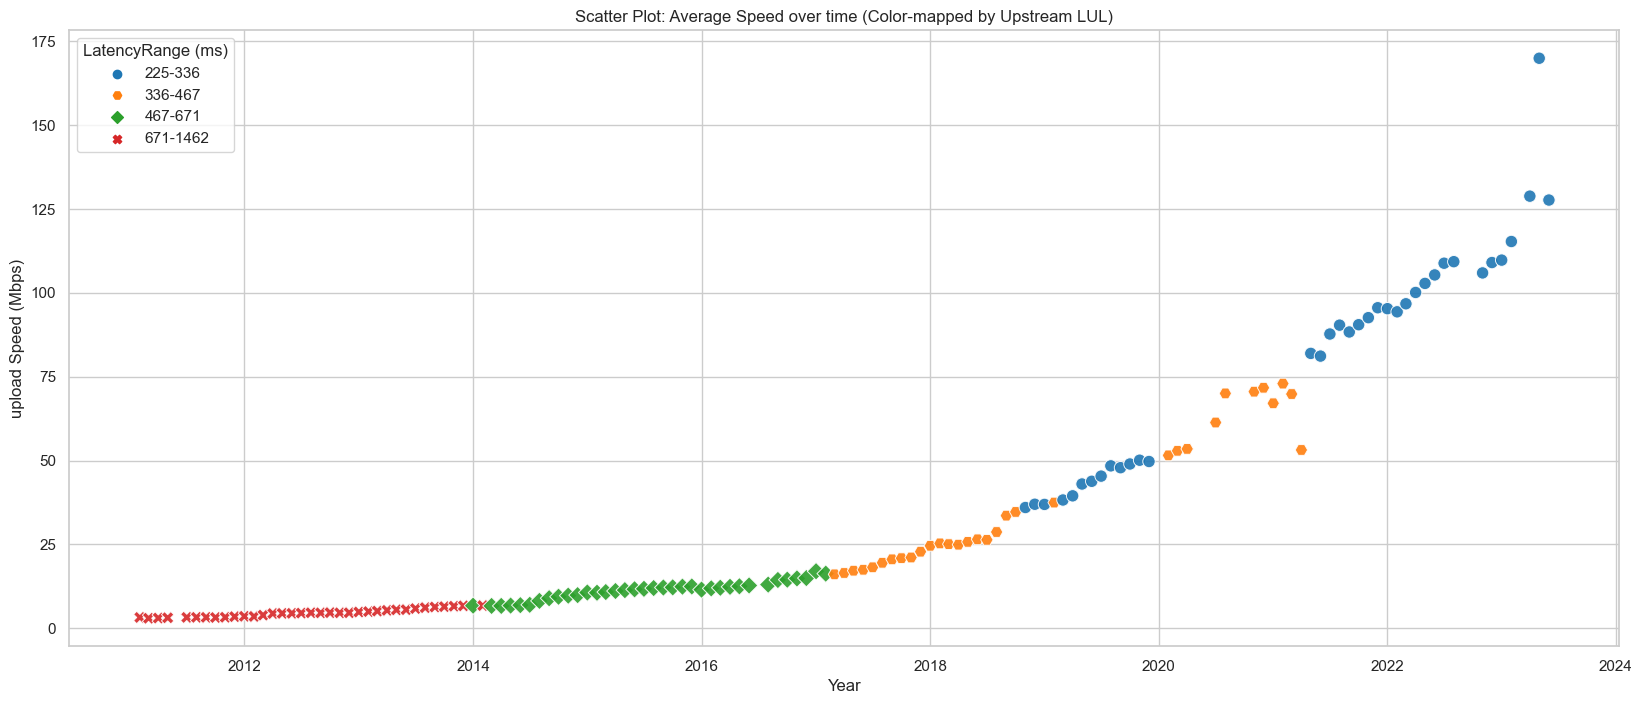

In [19]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='LatencyRange (ms)', style='LatencyRange (ms)' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('upload Speed (Mbps)')
plt.title('Scatter Plot: Average Speed over time (Color-mapped by Upstream LUL)')
plt.show()

# Cable

## Idle latency vs Average download speed for Cable (Jan 2011 - Jul 2023)

In [20]:
latency = pd.read_csv("data_rtt_max_monthly/Average of Idle latency-Cable.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average download speed-Cable.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
# Define bins and labels for the ranges
# bins = [0, 37, 42, 47, 100]
val = merge_df["Average latency (ms)"].describe().values
bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

merge_df['LatencyRange (ms)'] = pd.cut(merge_df['Average latency (ms)'], bins=bins, labels=labels, right=False)
merge_df.tail()
print(merge_df["LatencyRange (ms)"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

+-------+---------------------+
|       |   LatencyRange (ms) |
+=======+=====================+
| 31-40 |                34.0 |
+-------+---------------------+
| 40-42 |                33.0 |
+-------+---------------------+
| 42-46 |                43.0 |
+-------+---------------------+
| 46-61 |                35.0 |
+-------+---------------------+


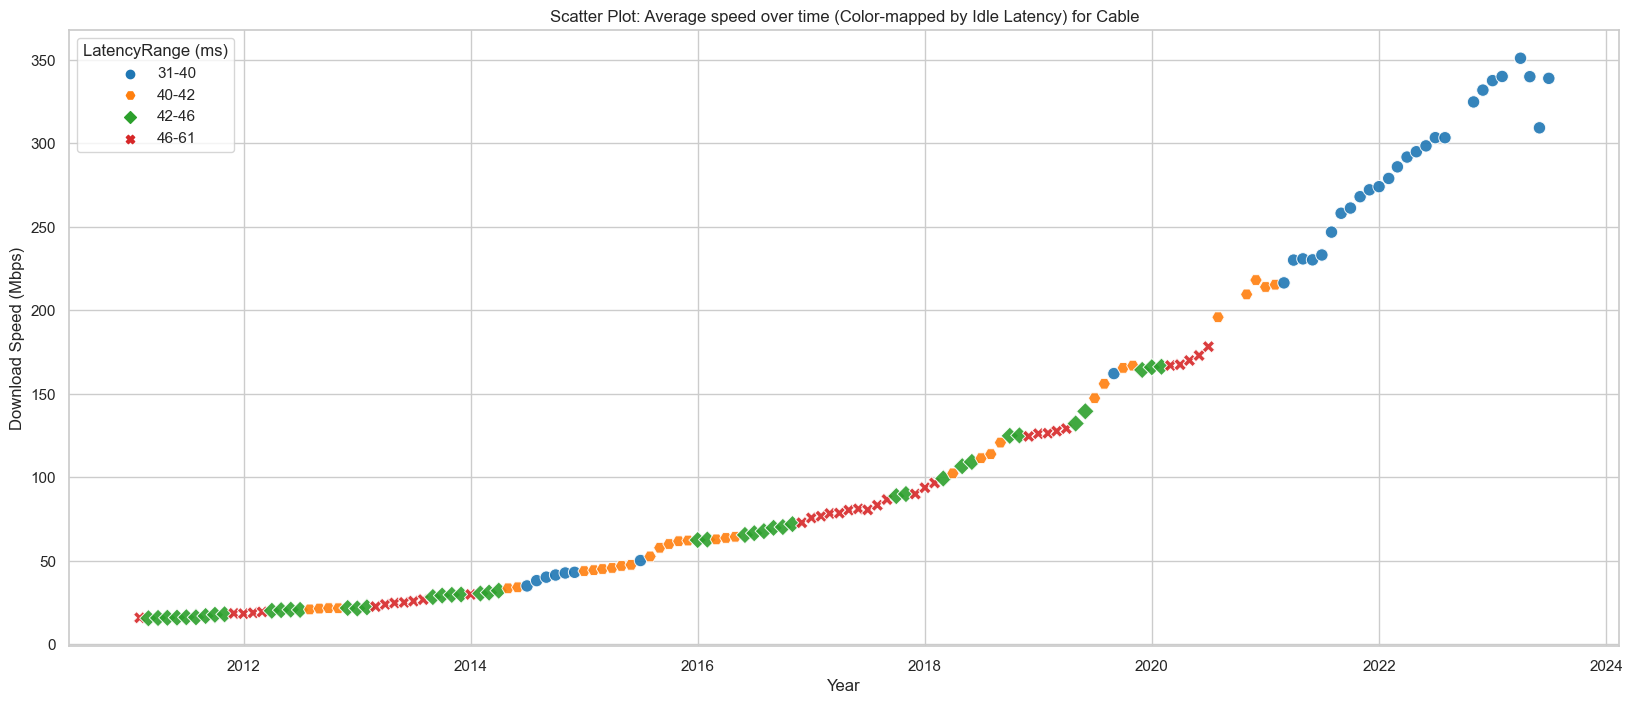

In [21]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='LatencyRange (ms)', style='LatencyRange (ms)' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by Idle Latency) for Cable')
plt.show()

## Downstream LUL vs Average download speed for Cable (Jan 2011 - Jul 2023)

In [22]:
latency = pd.read_csv("data_rtt_max_monthly/Average of downstream LUL-Cable.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average download speed-Cable.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
# Define bins and labels for the ranges
# bins = [0, 230, 280, 330, 390]
val = merge_df["Average latency (ms)"].describe().values
bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

merge_df['LatencyRange (ms)'] = pd.cut(merge_df['Average latency (ms)'], bins=bins, labels=labels, right=False)
merge_df.tail()
print(merge_df["LatencyRange (ms)"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

+---------+---------------------+
|         |   LatencyRange (ms) |
+=========+=====================+
| 123-237 |                36.0 |
+---------+---------------------+
| 237-281 |                35.0 |
+---------+---------------------+
| 281-325 |                36.0 |
+---------+---------------------+
| 325-396 |                35.0 |
+---------+---------------------+


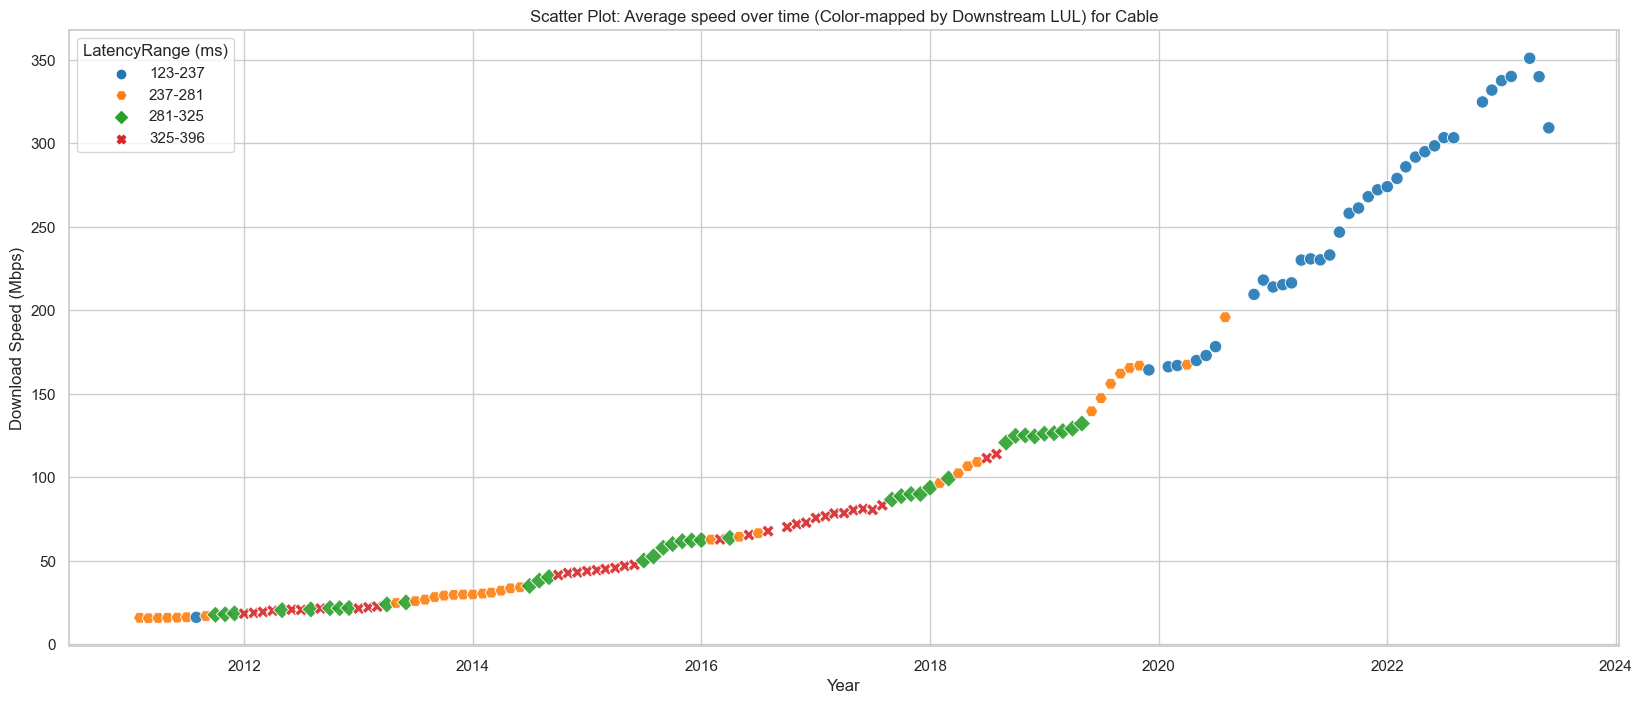

In [23]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='LatencyRange (ms)', style='LatencyRange (ms)' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by Downstream LUL) for Cable')
plt.show()

## Upstream LUL vs Average upload speed for Cable (Jan 2011 - Jul 2023)

In [24]:
latency = pd.read_csv("data_rtt_max_monthly/Average of Upstream LUL-Cable.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average upload speed-Cable.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['Average latency (ms)'] = merge_df['Average latency (ms)'].str.replace(",","").astype(float)
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
# Define bins and labels for the ranges
# bins = [0, 275, 450, 800, 1500]
val = merge_df["Average latency (ms)"].describe().values
bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

merge_df['LatencyRange (ms)'] = pd.cut(merge_df['Average latency (ms)'], bins=bins, labels=labels, right=False)
merge_df.tail()
print(merge_df["LatencyRange (ms)"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

+----------+---------------------+
|          |   LatencyRange (ms) |
+==========+=====================+
| 217-271  |                36.0 |
+----------+---------------------+
| 271-406  |                35.0 |
+----------+---------------------+
| 406-612  |                36.0 |
+----------+---------------------+
| 612-1109 |                36.0 |
+----------+---------------------+


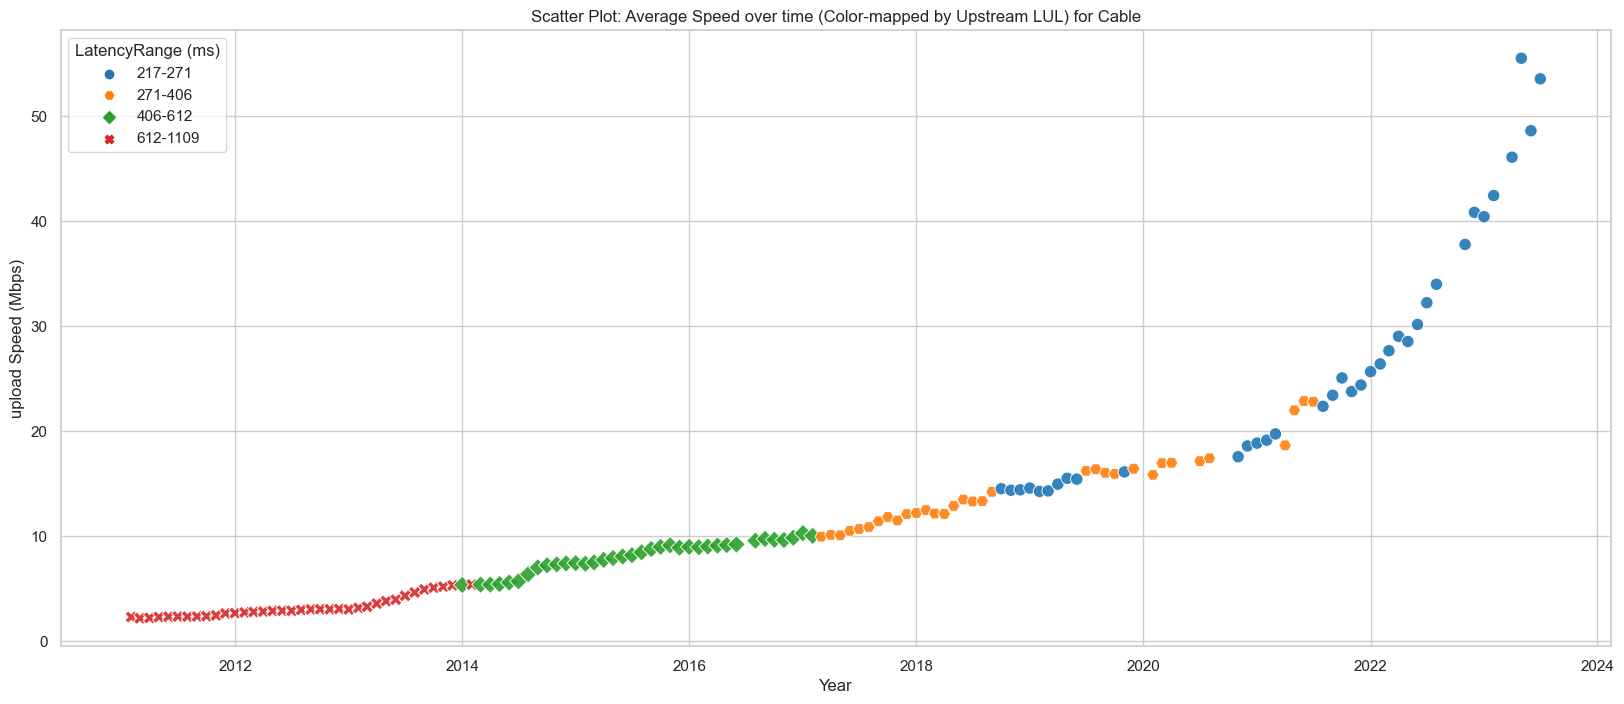

In [25]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='LatencyRange (ms)', style='LatencyRange (ms)' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('upload Speed (Mbps)')
plt.title('Scatter Plot: Average Speed over time (Color-mapped by Upstream LUL) for Cable')
plt.show()

## Idle latency vs Average download speed for Cable (Jan 2011 - Jul 2023)

In [26]:
latency = pd.read_csv("data_rtt_max_monthly/Average of Idle latency-Cable.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average download speed-Cable.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
# Define bins and labels for the ranges
# bins = [0, 30, 42, 47, 100]
val = merge_df["Average speed (Mbps)"].describe().values
bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

merge_df['SpeedRange (ms)'] = pd.cut(merge_df['Average speed (Mbps)'], bins=bins, labels=labels, right=False)
merge_df.tail()
print(merge_df["SpeedRange (ms)"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

+---------+-------------------+
|         |   SpeedRange (ms) |
+=========+===================+
| 16-30   |              32.0 |
+---------+-------------------+
| 30-77   |              37.0 |
+---------+-------------------+
| 77-167  |              36.0 |
+---------+-------------------+
| 167-351 |              35.0 |
+---------+-------------------+


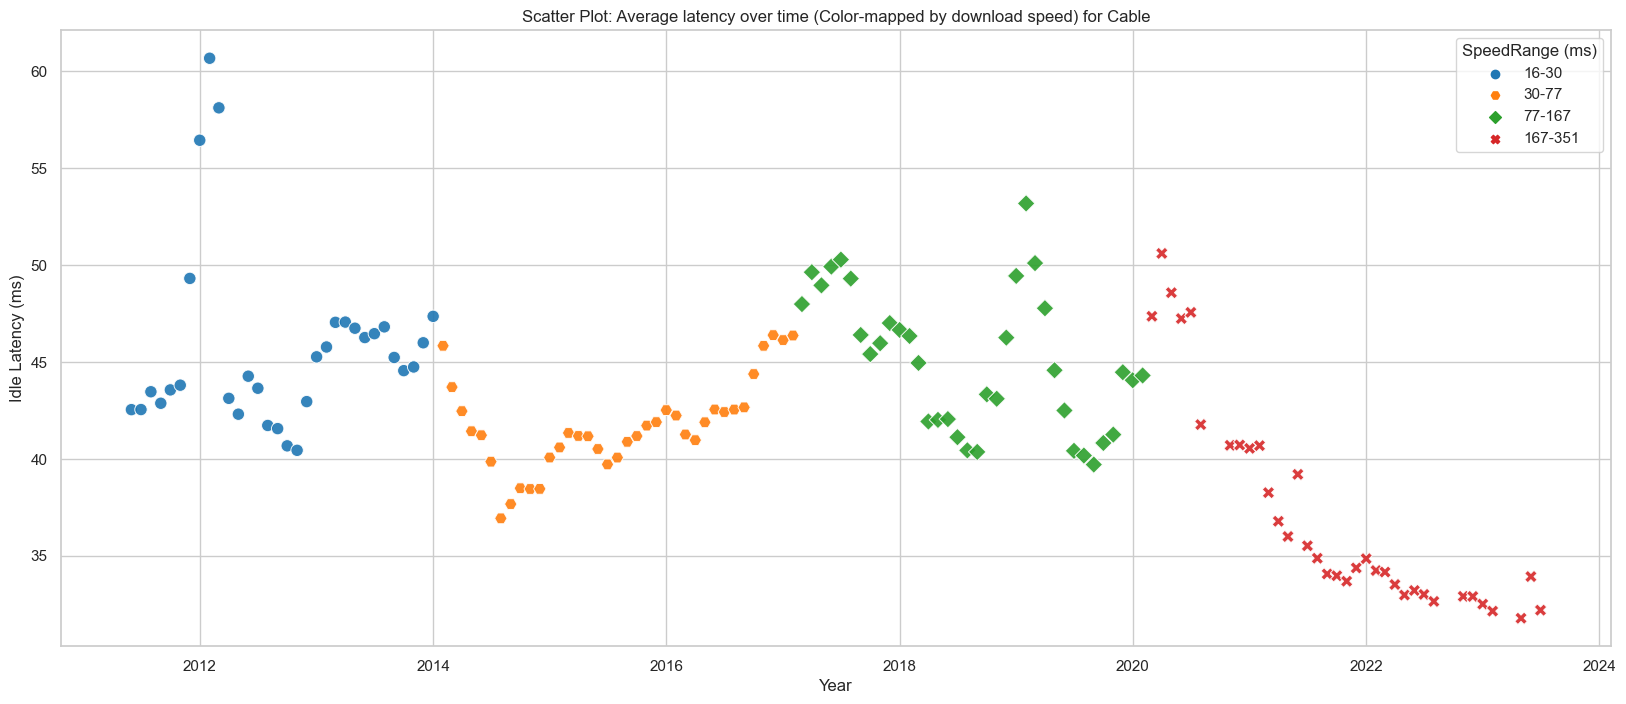

In [31]:
sns.scatterplot(x='dtime per month', y='Average latency (ms)', hue='SpeedRange (ms)', style='SpeedRange (ms)' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
plt.xlabel('Year')
plt.ylabel('Idle Latency (ms)')
plt.title('Scatter Plot: Average latency over time (Color-mapped by download speed) for Cable')
plt.show()

## Data after 2021

### Idle latency vs Average download speed for Cable (Jan 2011 - Jul 2023)

In [4]:
latency = pd.read_csv("data_rtt_max_week/Average of Idle latency-Cable.csv")
speed = pd.read_csv("data_rtt_max_week/Average download speed-Cable.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per week")
merge_df['dtime per week'] = pd.to_datetime(merge_df['dtime per week'], format='%Y-%m-%d')
merge_df = merge_df[merge_df['dtime per week'].dt.year > 2020]
# Define bins and labels for the ranges
# bins = [0, 37, 42, 47, 100]
val = merge_df["Average latency (ms)"].describe().values
bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

merge_df['LatencyRange (ms)'] = pd.cut(merge_df['Average latency (ms)'], bins=bins, labels=labels, right=False)
merge_df.tail()
print(merge_df["LatencyRange (ms)"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

+-------+---------------------+
|       |   LatencyRange (ms) |
+=======+=====================+
| 31-33 |                42.0 |
+-------+---------------------+
| 33-34 |                26.0 |
+-------+---------------------+
| 34-35 |                22.0 |
+-------+---------------------+
| 35-50 |                34.0 |
+-------+---------------------+


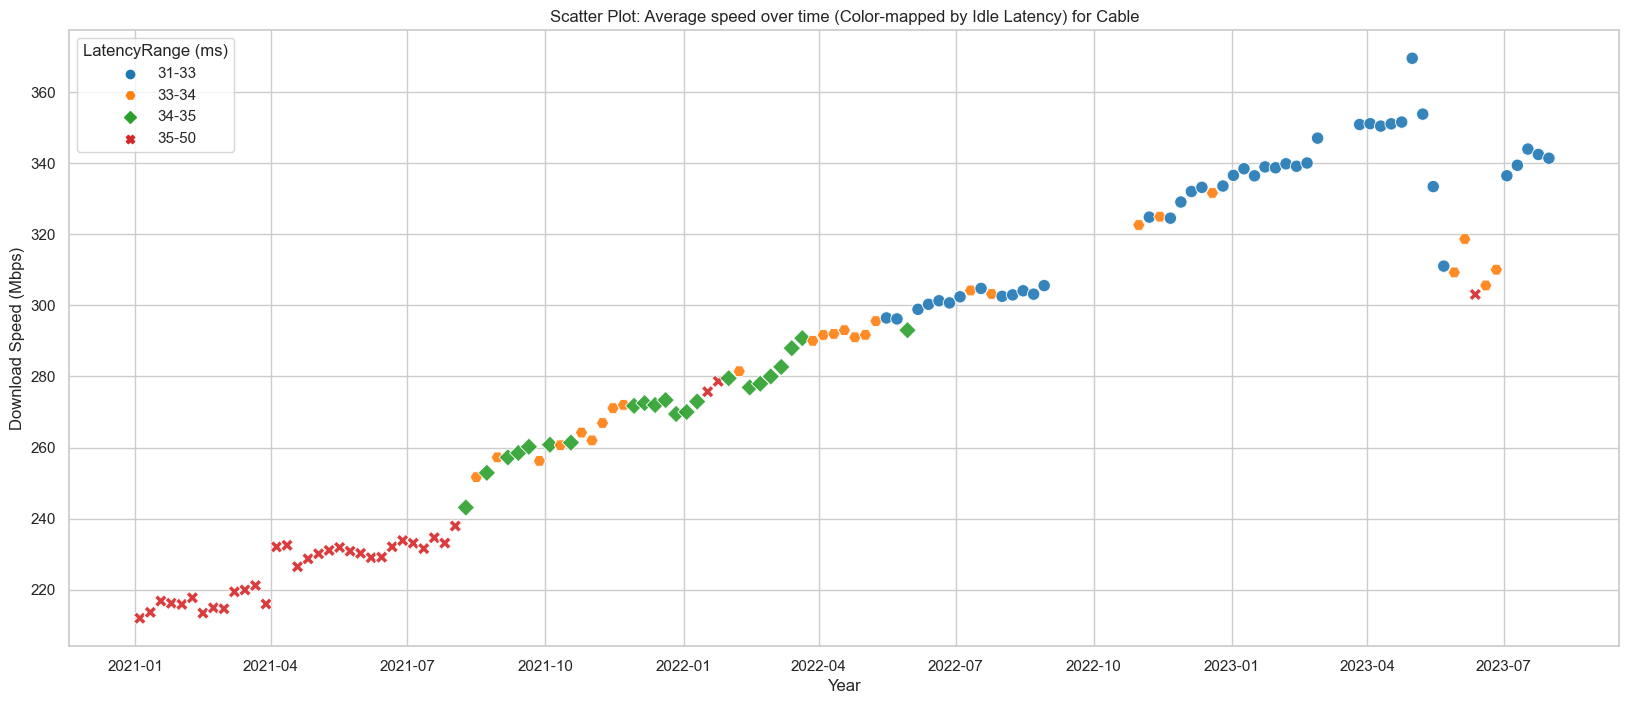

In [9]:
sns.scatterplot(x='dtime per week', y='Average speed (Mbps)', hue='LatencyRange (ms)', style='LatencyRange (ms)' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by Idle Latency) for Cable')
plt.show()

### Downstream LUL vs Average download speed for Cable (Jan 2011 - Jul 2023)

In [10]:
latency = pd.read_csv("data_rtt_max_week/Average of downstream LUL-Cable.csv")
speed = pd.read_csv("data_rtt_max_week/Average download speed-Cable.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per week")
merge_df['dtime per week'] = pd.to_datetime(merge_df['dtime per week'], format='%Y-%m-%d')
merge_df = merge_df[merge_df['dtime per week'].dt.year > 2020]
# Define bins and labels for the ranges
# bins = [0, 230, 280, 330, 390]
val = merge_df["Average latency (ms)"].describe().values
bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

merge_df['LatencyRange (ms)'] = pd.cut(merge_df['Average latency (ms)'], bins=bins, labels=labels, right=False)
merge_df.tail()
print(merge_df["LatencyRange (ms)"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

+---------+---------------------+
|         |   LatencyRange (ms) |
+=========+=====================+
| 121-186 |                33.0 |
+---------+---------------------+
| 186-200 |                29.0 |
+---------+---------------------+
| 200-211 |                31.0 |
+---------+---------------------+
| 211-231 |                31.0 |
+---------+---------------------+


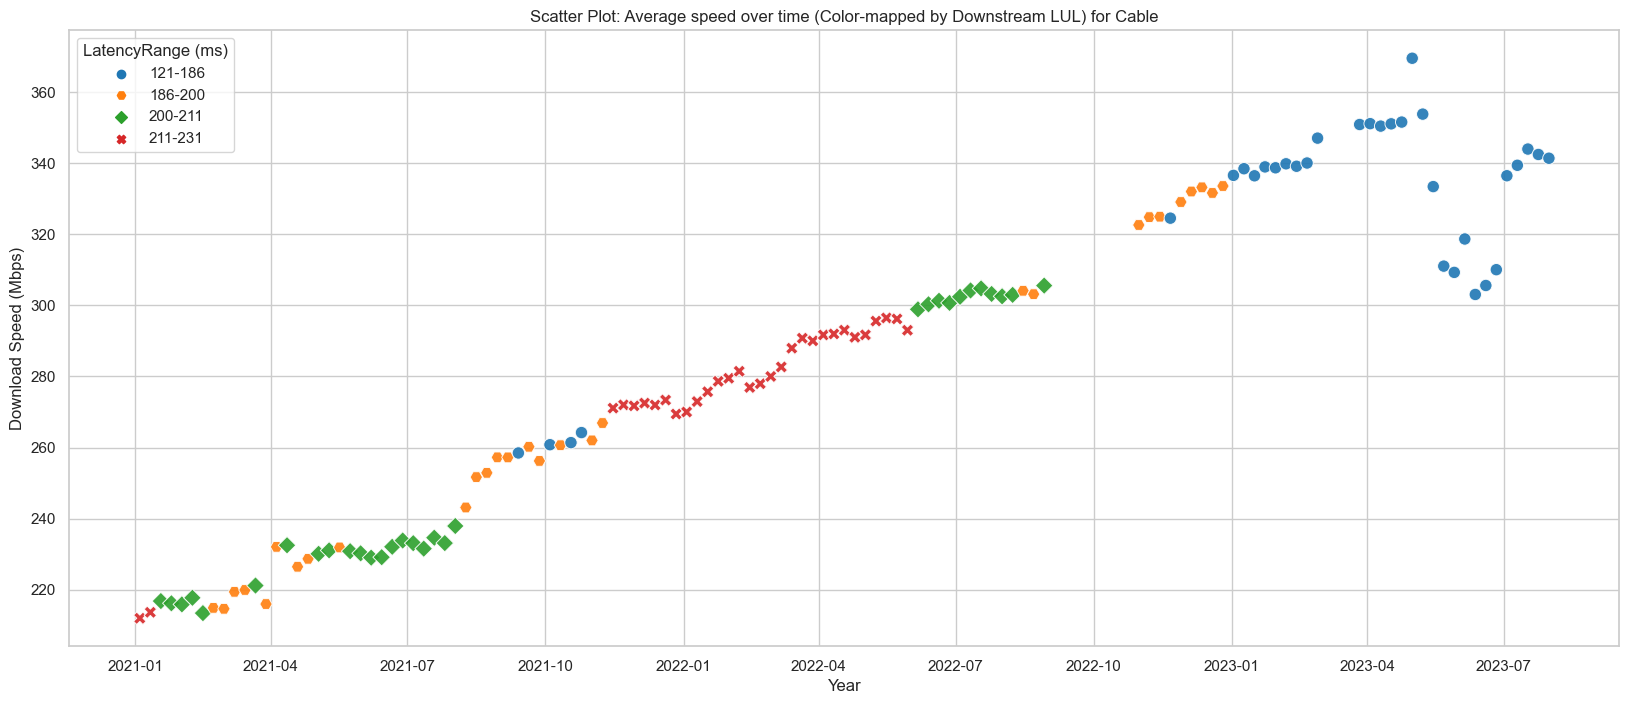

In [11]:
sns.scatterplot(x='dtime per week', y='Average speed (Mbps)', hue='LatencyRange (ms)', style='LatencyRange (ms)' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by Downstream LUL) for Cable')
plt.show()

### Upstream LUL vs Average upload speed for Cable (Jan 2011 - Jul 2023)

In [12]:
latency = pd.read_csv("data_rtt_max_week/Average of Upstream LUL-Cable.csv")
speed = pd.read_csv("data_rtt_max_week/Average upload speed-Cable.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per week")
merge_df['Average latency (ms)'] = merge_df['Average latency (ms)'].str.replace(",","").astype(float)
merge_df['dtime per week'] = pd.to_datetime(merge_df['dtime per week'], format='%Y-%m-%d')
merge_df = merge_df[merge_df['dtime per week'].dt.year > 2020]
# Define bins and labels for the ranges
# bins = [0, 275, 450, 800, 1500]
val = merge_df["Average latency (ms)"].describe().values
bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

merge_df['LatencyRange (ms)'] = pd.cut(merge_df['Average latency (ms)'], bins=bins, labels=labels, right=False)
merge_df.tail()
print(merge_df["LatencyRange (ms)"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

+---------+---------------------+
|         |   LatencyRange (ms) |
+=========+=====================+
| 213-229 |                31.0 |
+---------+---------------------+
| 229-242 |                31.0 |
+---------+---------------------+
| 242-270 |                31.0 |
+---------+---------------------+
| 270-278 |                29.0 |
+---------+---------------------+


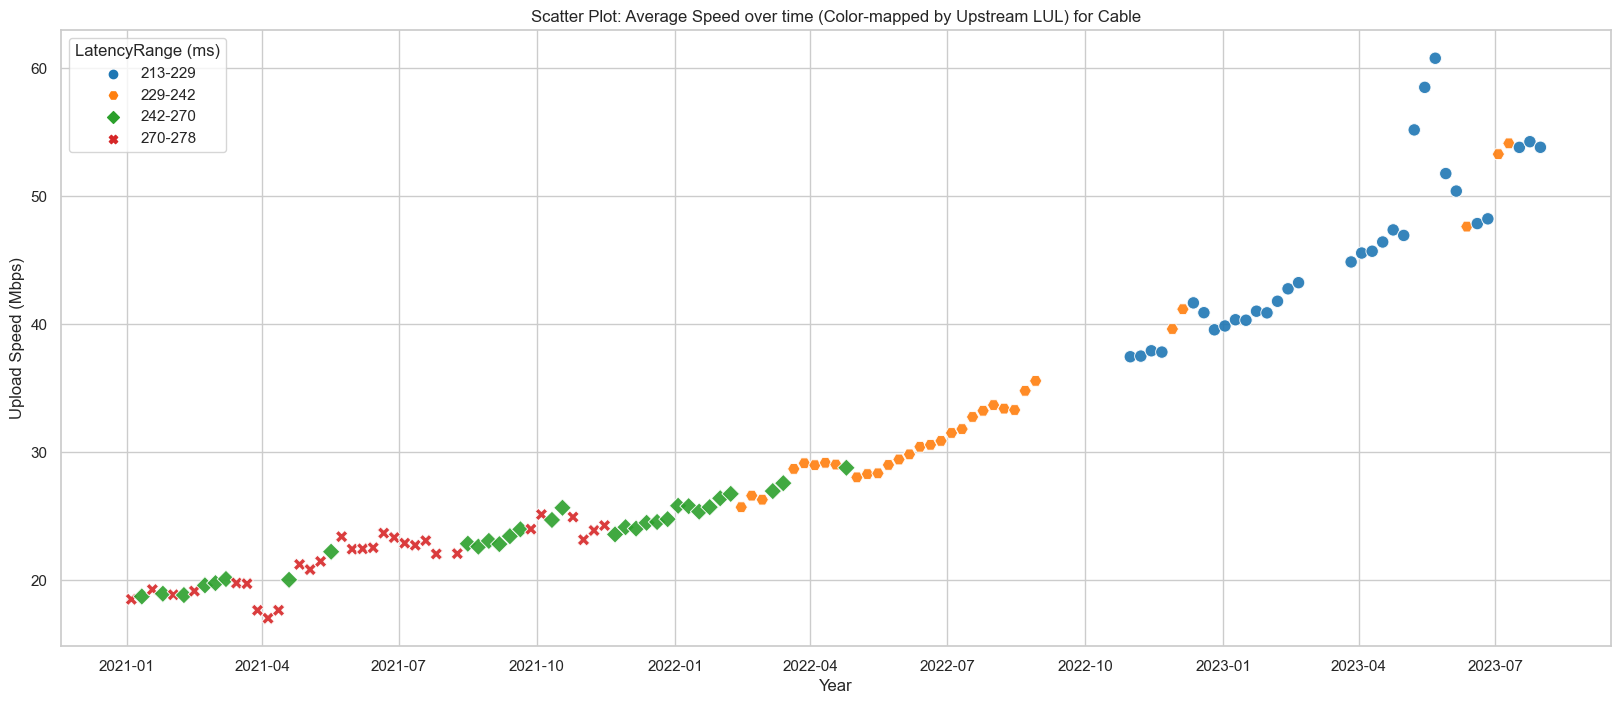

In [14]:
sns.scatterplot(x='dtime per week', y='Average speed (Mbps)', hue='LatencyRange (ms)', style='LatencyRange (ms)' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Upload Speed (Mbps)')
plt.title('Scatter Plot: Average Speed over time (Color-mapped by Upstream LUL) for Cable')
plt.show()

# Fiber

## Idle latency vs Average download speed for Fiber (Jan 2011 - Jul 2023)

In [32]:
latency = pd.read_csv("data_rtt_max_monthly/Average of Idle latency-Fiber.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average download speed-Fiber.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
# Define bins and labels for the ranges
# bins = [0, 20, 22, 25, 100]
val = merge_df["Average latency (ms)"].describe().values
bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

merge_df['LatencyRange (ms)'] = pd.cut(merge_df['Average latency (ms)'], bins=bins, labels=labels, right=False)
merge_df.tail()
print(merge_df["LatencyRange (ms)"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

+-------+---------------------+
|       |   LatencyRange (ms) |
+=======+=====================+
| 15-20 |                40.0 |
+-------+---------------------+
| 20-22 |                38.0 |
+-------+---------------------+
| 22-25 |                33.0 |
+-------+---------------------+
| 25-67 |                34.0 |
+-------+---------------------+


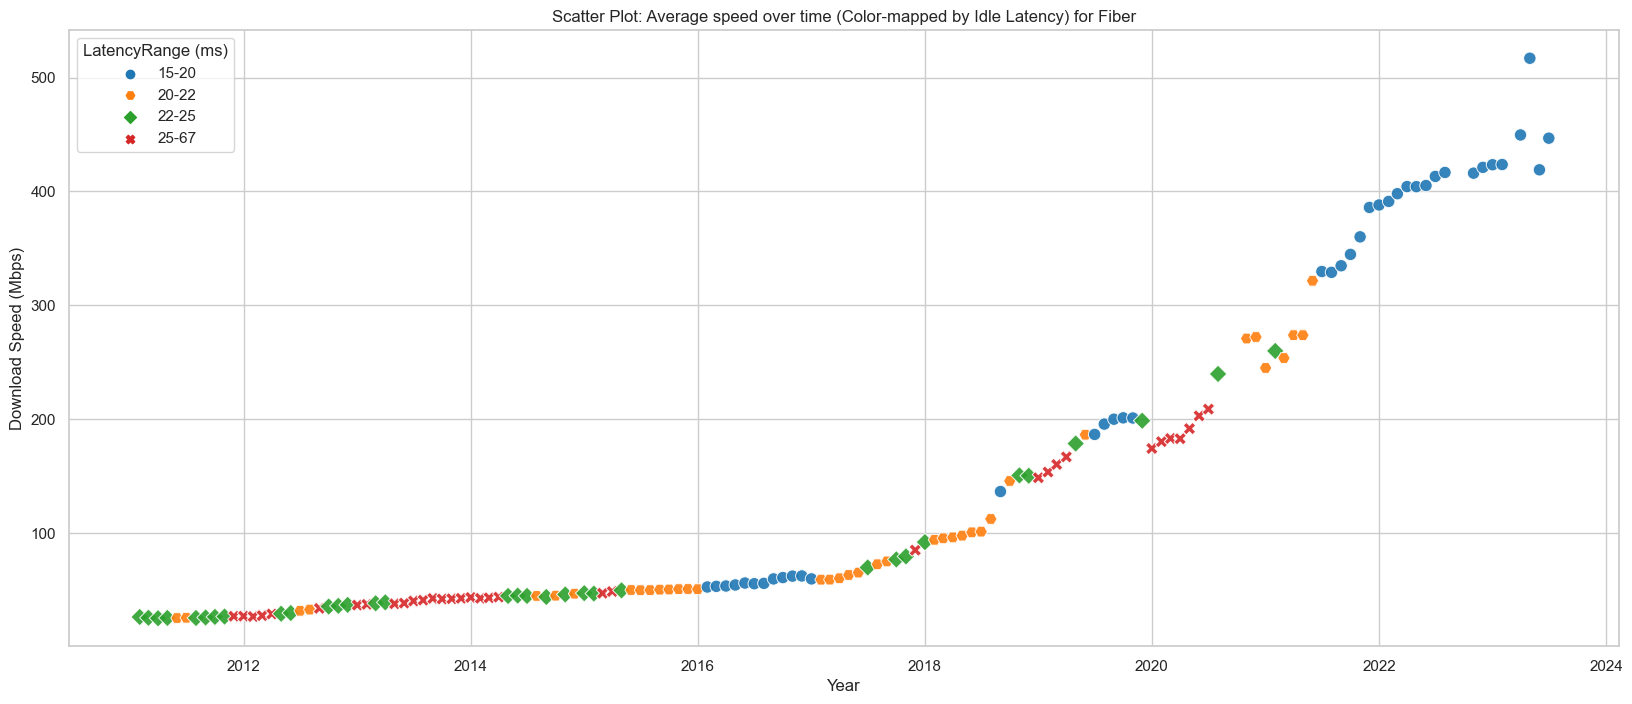

In [33]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='LatencyRange (ms)', style='LatencyRange (ms)' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by Idle Latency) for Fiber')
plt.show()

## Downstream LUL vs Average download speed for Fiber (Jan 2011 - Jul 2023)

In [34]:
latency = pd.read_csv("data_rtt_max_monthly/Average of downstream LUL-Fiber.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average download speed-Fiber.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
# Define bins and labels for the ranges
# bins = [0, 90, 135, 200, 300]
val = merge_df["Average latency (ms)"].describe().values
bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

merge_df['LatencyRange (ms)'] = pd.cut(merge_df['Average latency (ms)'], bins=bins, labels=labels, right=False)
merge_df.tail()
print(merge_df["LatencyRange (ms)"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

+---------+---------------------+
|         |   LatencyRange (ms) |
+=========+=====================+
| 69-91   |                36.0 |
+---------+---------------------+
| 91-132  |                35.0 |
+---------+---------------------+
| 132-192 |                36.0 |
+---------+---------------------+
| 192-296 |                36.0 |
+---------+---------------------+


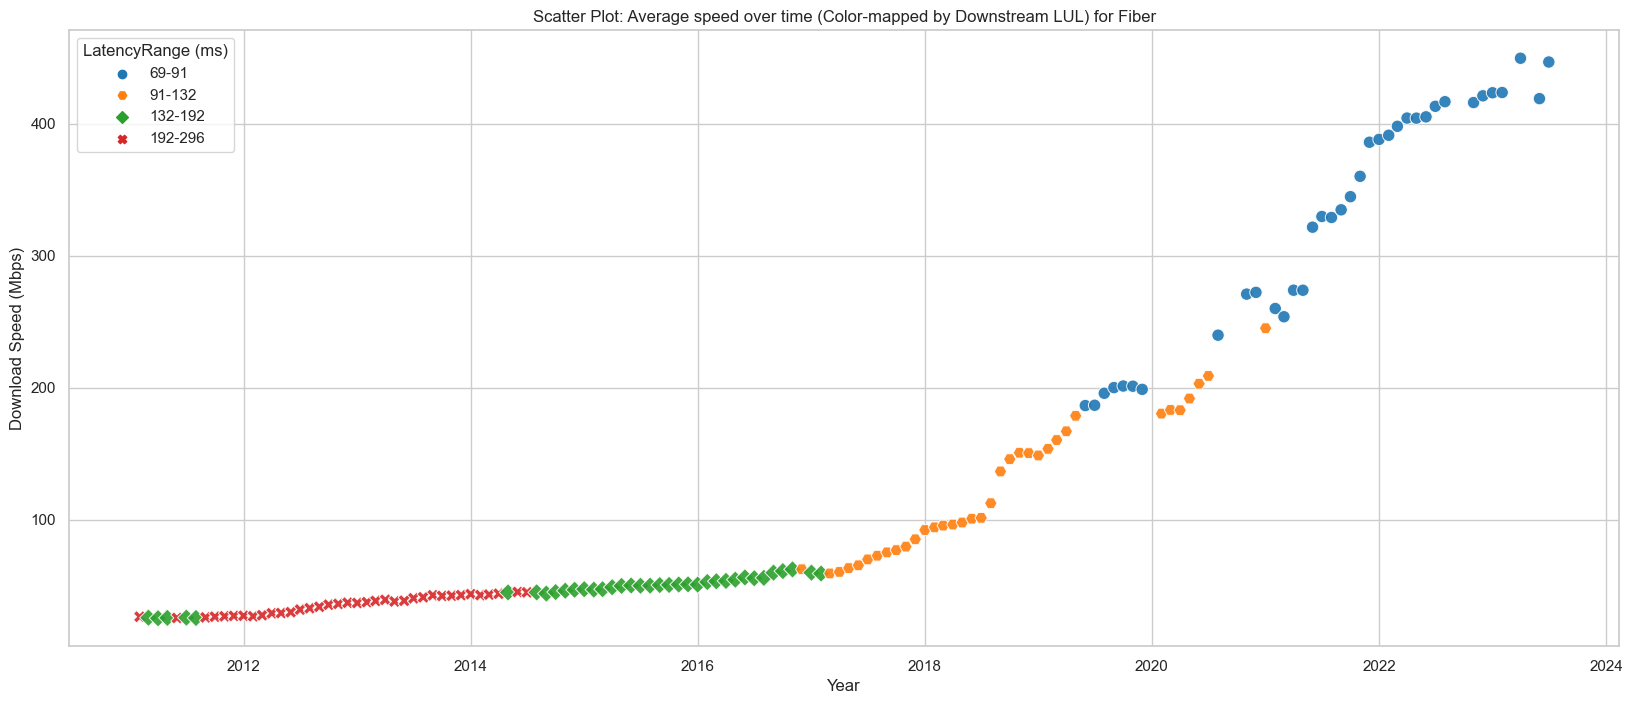

In [35]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='LatencyRange (ms)', style='LatencyRange (ms)' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by Downstream LUL) for Fiber')
plt.show()

## Upstream LUL vs Average upload speed for Fiber (Jan 2011 - Jul 2023)

In [36]:
latency = pd.read_csv("data_rtt_max_monthly/Average of Upstream LUL-Fiber.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average upload speed-Fiber.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
# merge_df['Average latency (ms)'] = merge_df['Average latency (ms)'].str.replace(",","").astype(float)
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
# Define bins and labels for the ranges
# bins = [0, 130, 180, 250, 360]
val = merge_df["Average latency (ms)"].describe().values
bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

merge_df['LatencyRange (ms)'] = pd.cut(merge_df['Average latency (ms)'], bins=bins, labels=labels, right=False)
merge_df.tail()
print(merge_df["LatencyRange (ms)"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

+---------+---------------------+
|         |   LatencyRange (ms) |
+=========+=====================+
| 62-116  |                35.0 |
+---------+---------------------+
| 116-179 |                36.0 |
+---------+---------------------+
| 179-253 |                35.0 |
+---------+---------------------+
| 253-357 |                35.0 |
+---------+---------------------+


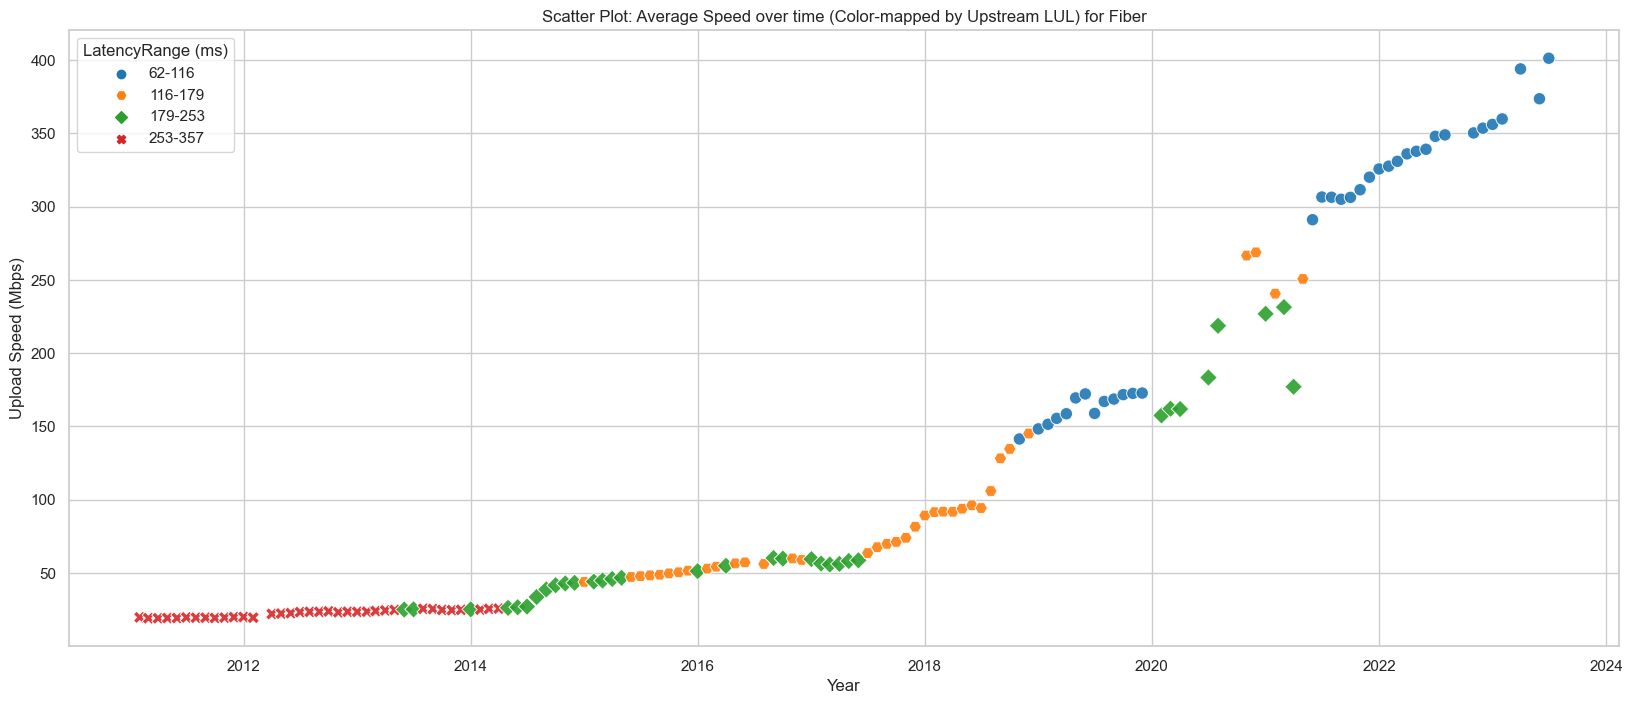

In [37]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='LatencyRange (ms)', style='LatencyRange (ms)' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Upload Speed (Mbps)')
plt.title('Scatter Plot: Average Speed over time (Color-mapped by Upstream LUL) for Fiber')
plt.show()

# DSL

## Idle latency vs Average download speed for DSL (Jan 2011 - Jul 2023)

In [38]:
latency = pd.read_csv("data_rtt_max_monthly/Average of Idle latency-DSL.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average download speed-DSL.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
# Define bins and labels for the ranges
# bins = [0, 55, 60, 65, 70]
val = merge_df["Average latency (ms)"].describe().values
bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

merge_df['LatencyRange (ms)'] = pd.cut(merge_df['Average latency (ms)'], bins=bins, labels=labels, right=False)
merge_df.tail()
print(merge_df["LatencyRange (ms)"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

+-------+---------------------+
|       |   LatencyRange (ms) |
+=======+=====================+
| 48-55 |                35.0 |
+-------+---------------------+
| 55-59 |                39.0 |
+-------+---------------------+
| 59-63 |                35.0 |
+-------+---------------------+
| 63-69 |                35.0 |
+-------+---------------------+


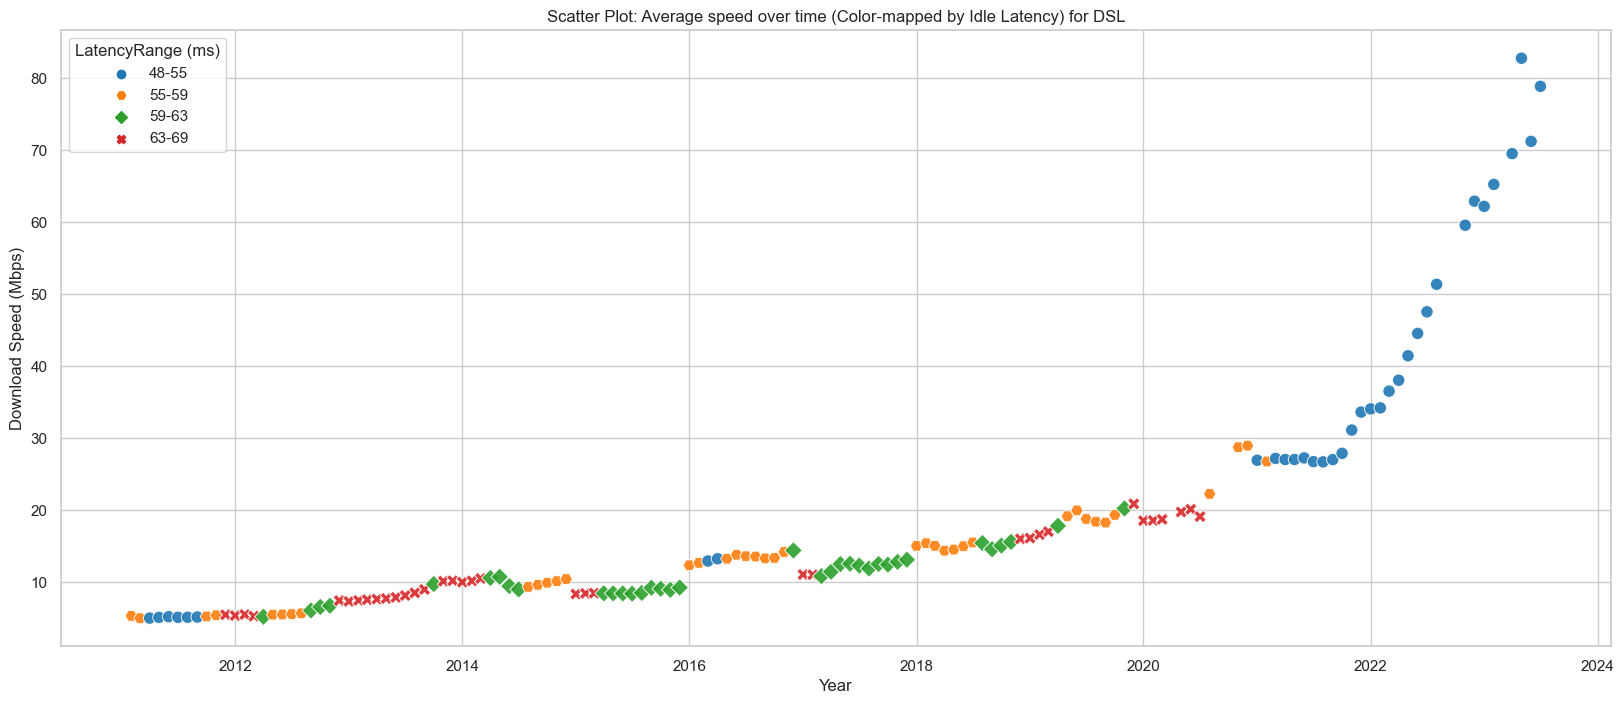

In [39]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='LatencyRange (ms)', style='LatencyRange (ms)' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by Idle Latency) for DSL')
plt.show()

## Downstream LUL vs Average download speed for DSL (Jan 2011 - Jul 2023)

In [40]:
latency = pd.read_csv("data_rtt_max_monthly/Average of downstream LUL-DSL.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average download speed-DSL.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
# Define bins and labels for the ranges
# bins = [0, 250, 350, 425, 600]
val = merge_df["Average latency (ms)"].describe().values
bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

merge_df['LatencyRange (ms)'] = pd.cut(merge_df['Average latency (ms)'], bins=bins, labels=labels, right=False)
merge_df.tail()
print(merge_df["LatencyRange (ms)"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

+---------+---------------------+
|         |   LatencyRange (ms) |
+=========+=====================+
| 195-270 |                36.0 |
+---------+---------------------+
| 270-355 |                34.0 |
+---------+---------------------+
| 355-411 |                36.0 |
+---------+---------------------+
| 411-583 |                36.0 |
+---------+---------------------+


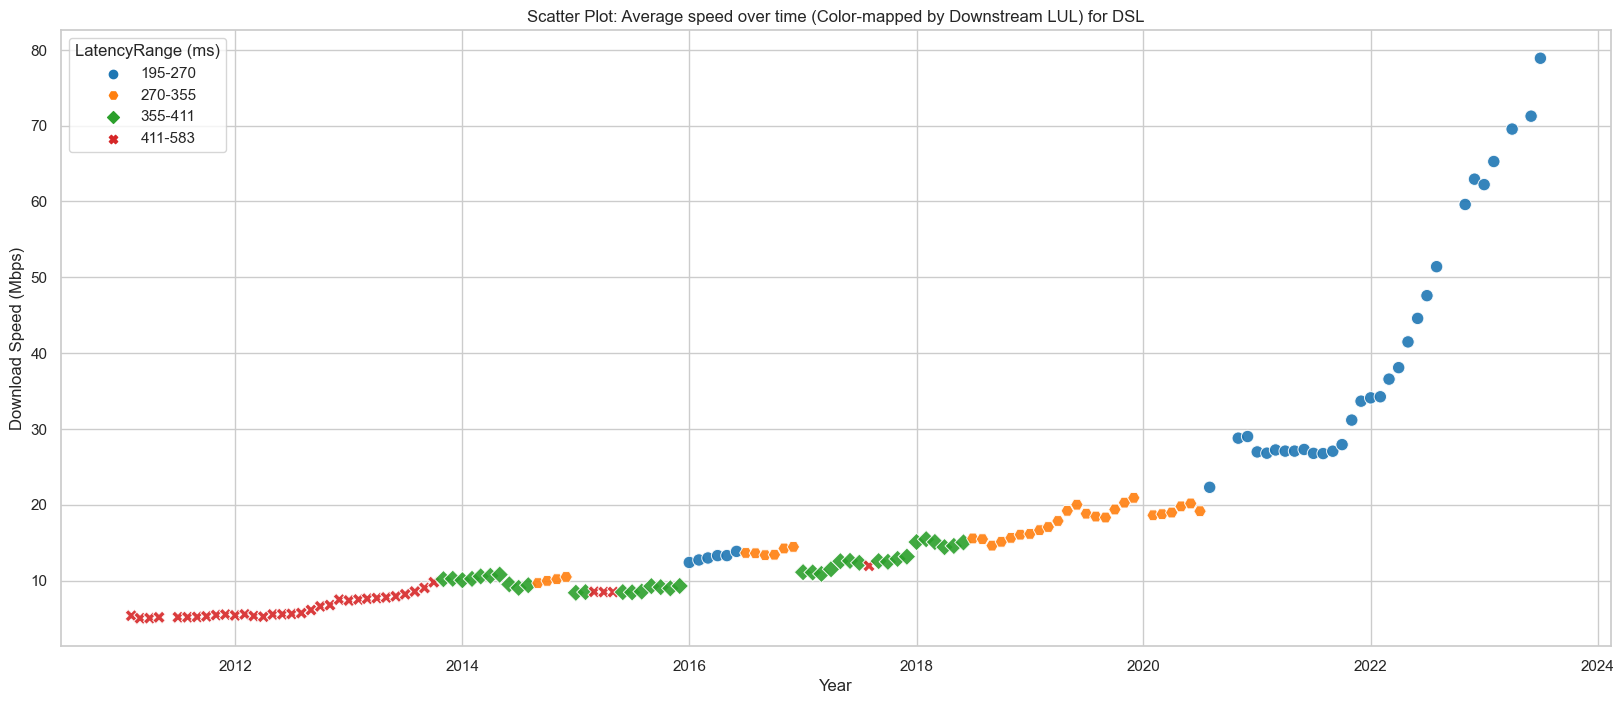

In [41]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='LatencyRange (ms)', style='LatencyRange (ms)' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Average speed over time (Color-mapped by Downstream LUL) for DSL')
plt.show()

## Upstream LUL vs Average upload speed for DSL (Jan 2011 - Jul 2023)

In [42]:
latency = pd.read_csv("data_rtt_max_monthly/Average of Upstream LUL-DSL.csv")
speed = pd.read_csv("data_rtt_max_monthly/Average upload speed-DSL.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per month")
merge_df['Average latency (ms)'] = merge_df['Average latency (ms)'].str.replace(",","").astype(float)
merge_df['dtime per month'] = pd.to_datetime(merge_df['dtime per month'], format='%Y-%m-%d')
# Define bins and labels for the ranges
# bins = [0, 750, 1000, 1150, 2500]
val = merge_df["Average latency (ms)"].describe().values
bins = [round(val[i]) for i in (3, 4, 5, 6, 7)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

merge_df['LatencyRange (ms)'] = pd.cut(merge_df['Average latency (ms)'], bins=bins, labels=labels, right=False)
merge_df.tail()
print(merge_df["LatencyRange (ms)"].value_counts().sort_index().to_markdown(tablefmt="grid", floatfmt=""))

+-----------+---------------------+
|           |   LatencyRange (ms) |
+===========+=====================+
| 460-741   |                36.0 |
+-----------+---------------------+
| 741-960   |                35.0 |
+-----------+---------------------+
| 960-1100  |                35.0 |
+-----------+---------------------+
| 1100-2398 |                35.0 |
+-----------+---------------------+


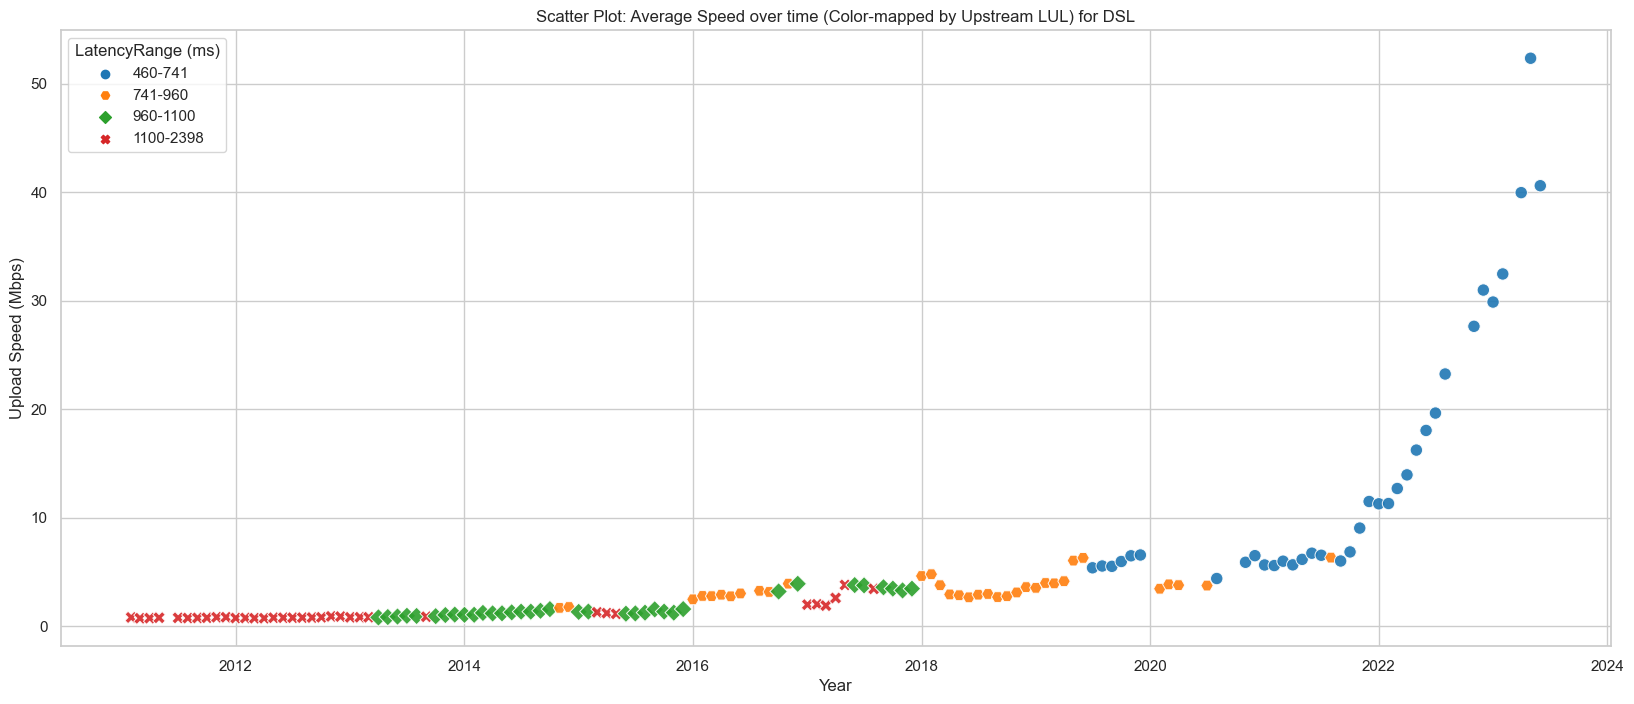

In [43]:
sns.scatterplot(x='dtime per month', y='Average speed (Mbps)', hue='LatencyRange (ms)', style='LatencyRange (ms)' 
                ,data=merge_df, palette='tab10', s=80, markers=['o', 'H', 'D', 'X'], alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.xlabel('Year')
plt.ylabel('Upload Speed (Mbps)')
plt.title('Scatter Plot: Average Speed over time (Color-mapped by Upstream LUL) for DSL')
plt.show()